In [ ]:
#Loading Dataset
import pandas as pd
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv('vocal_gender_features_new.csv')  ## to be done

print(df.head())
print(df.info())

Saving vocal_gender_features_new.csv to vocal_gender_features_new.csv
   mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0             2247.331739            1158.537748              1870.415462   
1             1790.719889             996.554825              1757.898617   
2             1977.923363            1010.148667              1747.099555   
3             2037.765550            1311.440630              1745.224852   
4             1739.383829            1092.623322              1623.135563   

   std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0              370.405241               21.440710                0.036879   
1              410.710318               21.513383                0.018936   
2              461.458379               20.476283                0.032616   
3              419.056484               19.516014                0.028482   
4              450.088465               20.260620                0.025737   

   m

In [ ]:
# Distribution of labels
print(df['label'].value_counts())

label
1    10380
0     5768
Name: count, dtype: int64


No missing values in dataset

In [ ]:
# Descriptive statistics for all numerical features
print(df.describe())

       mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
count            16148.000000           16148.000000             16148.000000   
mean              1709.269730            1027.564673              1584.195931   
std                315.558063             286.303662               126.360465   
min                719.559285             194.998983              1106.939002   
25%               1475.078509             829.195585              1503.301521   
50%               1703.038854            1048.531356              1583.959951   
75%               1921.202685            1233.451527              1665.806788   
max               3059.390150            1912.173446              2046.070801   

       std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
count            16148.000000            16148.000000            16148.000000   
mean               432.492328               20.395652                0.023086   
std                 78.7232

#Key Features to Consider for Model Training (Preliminary Analysis)
PITCH FEATURES:
- mean_pitch: This is a strong differentiator between male and female voices with a large range from 359 Hz to 2454 Hz.
- max_pitch: The maximum pitch will provide insight into the pitch variability, which is often higher in female voices.
- min_pitch: The minimum pitch can highlight the depth of male voices.
- std_pitch: This captures the pitch variability, another useful feature for distinguishing between genders.

ENERGY FEATURES:
- rms_energy: This is an important feature since male voices tend to have higher energy, and it also varies significantly.
- zero_crossing_rate: High zero-crossing rate can be linked to higher frequency (more rapid voice changes), which could help in differentiating male and female voices.

SPECTRAL FEATURES:
- mean_spectral_centroid: This feature provides insight into the brightness of the sound, which might differ between male and female voices.
- mean_spectral_bandwidth: This indicates the range of frequencies in the signal and can differ between gendered voices.
- mean_spectral_contrast: Could indicate the differentiation between different frequency components of the voice.

MFCC FEATURES:
- mfcc_1_mean, mfcc_2_mean, mfcc_3_mean: These are the most significant MFCCs and capture the timbral texture of the voice. These can help to classify voices based on how they sound, which will be useful for gender classification.
- mfcc_1_std: The variation in the first MFCC feature can also give additional discriminative power.

COMPLEXITY FEATURES:
- log_energy: This feature captures the logarithmic scale of energy and might provide a more normalized view of voice energy.
- energy_entropy: This measures the "complexity" or unpredictability of the energy, which can help distinguish voice patterns.

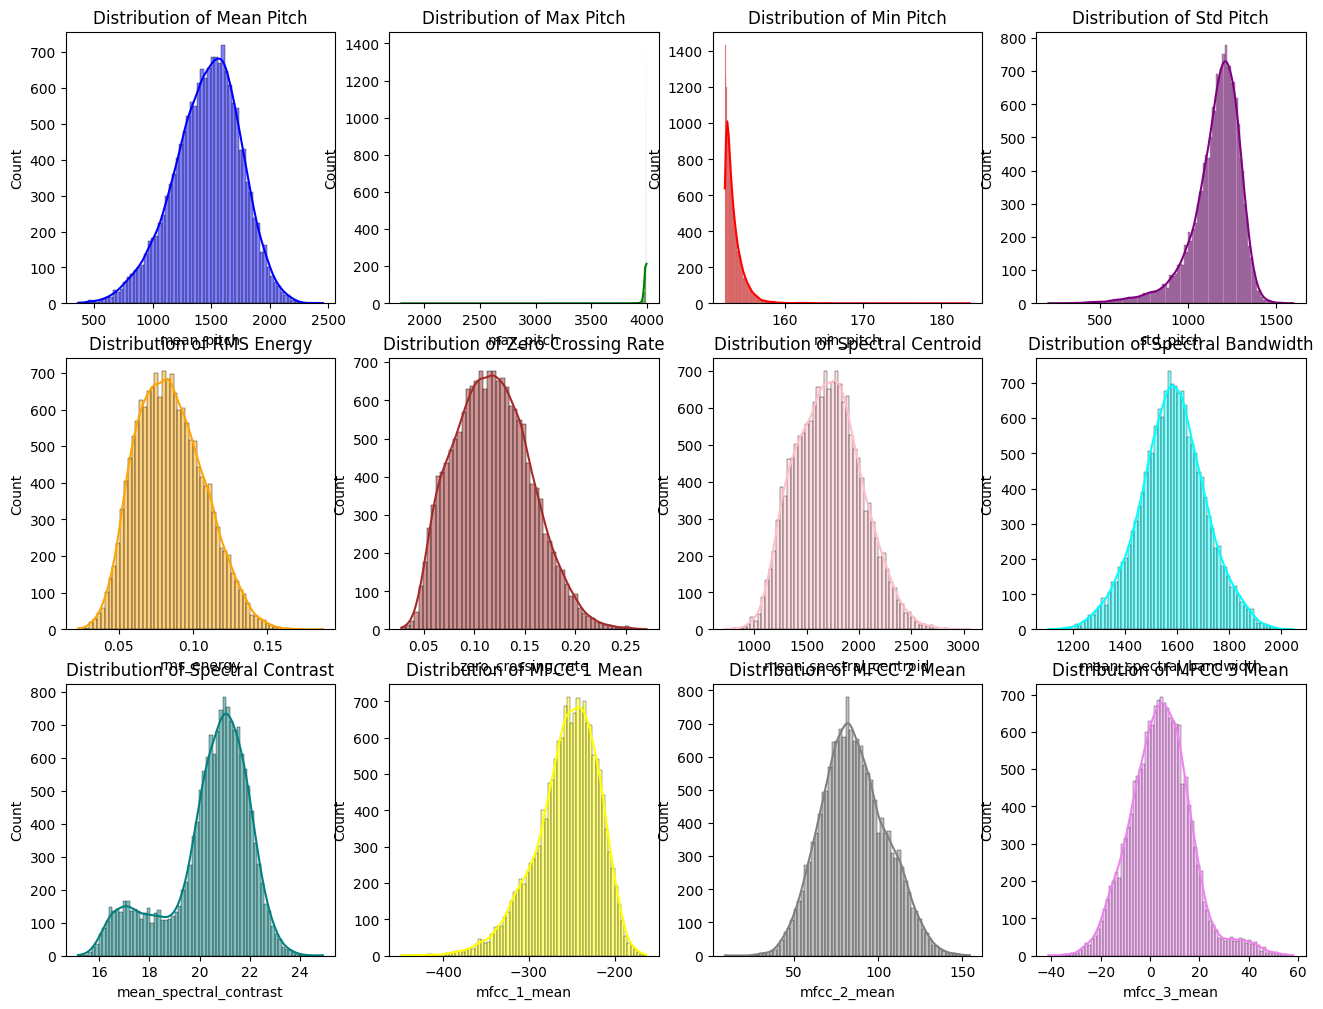

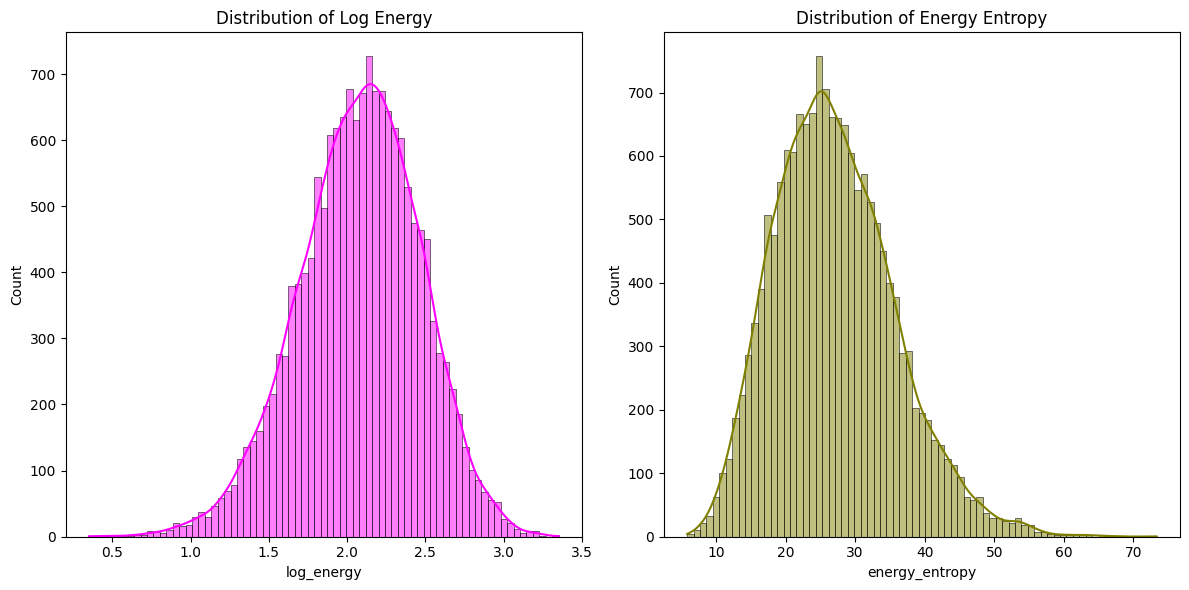

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting setup
plt.figure(figsize=(16, 12))

# Visualizing pitch features
plt.subplot(3, 4, 1)
sns.histplot(df['mean_pitch'], kde=True, color='blue')
plt.title('Distribution of Mean Pitch')

plt.subplot(3, 4, 2)
sns.histplot(df['max_pitch'], kde=True, color='green')
plt.title('Distribution of Max Pitch')

plt.subplot(3, 4, 3)
sns.histplot(df['min_pitch'], kde=True, color='red')
plt.title('Distribution of Min Pitch')

plt.subplot(3, 4, 4)
sns.histplot(df['std_pitch'], kde=True, color='purple')
plt.title('Distribution of Std Pitch')

# Visualizing energy features
plt.subplot(3, 4, 5)
sns.histplot(df['rms_energy'], kde=True, color='orange')
plt.title('Distribution of RMS Energy')

plt.subplot(3, 4, 6)
sns.histplot(df['zero_crossing_rate'], kde=True, color='brown')
plt.title('Distribution of Zero Crossing Rate')

# Visualizing spectral features
plt.subplot(3, 4, 7)
sns.histplot(df['mean_spectral_centroid'], kde=True, color='pink')
plt.title('Distribution of Spectral Centroid')

plt.subplot(3, 4, 8)
sns.histplot(df['mean_spectral_bandwidth'], kde=True, color='cyan')
plt.title('Distribution of Spectral Bandwidth')

plt.subplot(3, 4, 9)
sns.histplot(df['mean_spectral_contrast'], kde=True, color='teal')
plt.title('Distribution of Spectral Contrast')

# Visualizing MFCC features
plt.subplot(3, 4, 10)
sns.histplot(df['mfcc_1_mean'], kde=True, color='yellow')
plt.title('Distribution of MFCC 1 Mean')

plt.subplot(3, 4, 11)
sns.histplot(df['mfcc_2_mean'], kde=True, color='grey')
plt.title('Distribution of MFCC 2 Mean')

plt.subplot(3, 4, 12)
sns.histplot(df['mfcc_3_mean'], kde=True, color='violet')
plt.title('Distribution of MFCC 3 Mean')

# Additional feature
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['log_energy'], kde=True, color='magenta')
plt.title('Distribution of Log Energy')

plt.subplot(1, 2, 2)
sns.histplot(df['energy_entropy'], kde=True, color='olive')
plt.title('Distribution of Energy Entropy')

plt.tight_layout()
plt.show()

#Visualisation Interpretations
###For selecting the features
Pitch Features:
min_pitch is heavily skewed to the left, which is expected as male voices tend to have lower pitches.
max_pitch is skewed to the right, indicating that female voices generally have higher pitch ranges.

Spectral Contrast and MFCC Features:
Spectral contrast and MFCC features showing two peaks could indicate bimodal distributions, which may suggest that the data contains distinct groups or clusters — potentially representing male and female voices.
Implications:
Pitch Features: The min_pitch (low pitch) could help distinguish male voices, while the max_pitch (high pitch) and mean_pitch (central pitch value) might help in identifying female voices. The fact that max_pitch and mean_pitch are near the extremes of the distribution supports the idea that these are good features for distinguishing between male and female voices.

Bimodal Distribution in Spectral Contrast and MFCC Features:
This suggests that there may be different voice types or tonal qualities within the dataset. Since MFCCs represent the timbral texture of the voice, having two peaks may indicate that there are two dominant voice characteristics, which could be helpful for classification.
We could use this information to further refine feature selection and make sure that we capture the right features for classification.

Next Steps Based on Insights:
Normalizing Skewed Data:
For features like min_pitch (which has a left-skewed distribution), we might want to apply a transformation such as a log or square root transformation to reduce the skewness. This helps the model perform better, especially for algorithms that are sensitive to skewed data distributions.
The max_pitch is near the right end, but might still benefit from some scaling to ensure it's comparable with other features.

Bimodal Features:
Since spectral contrast and MFCC features show bimodal distributions, we might want to keep them as they are but carefully assess if we need to apply techniques like Gaussian Mixture Models or other clustering techniques for feature engineering, depending on the classifier we use.
Feature Scaling: Since some features have wide ranges and different distributions, standardization or Min-Max scaling will be crucial before training the models to bring all the features to a common scale.


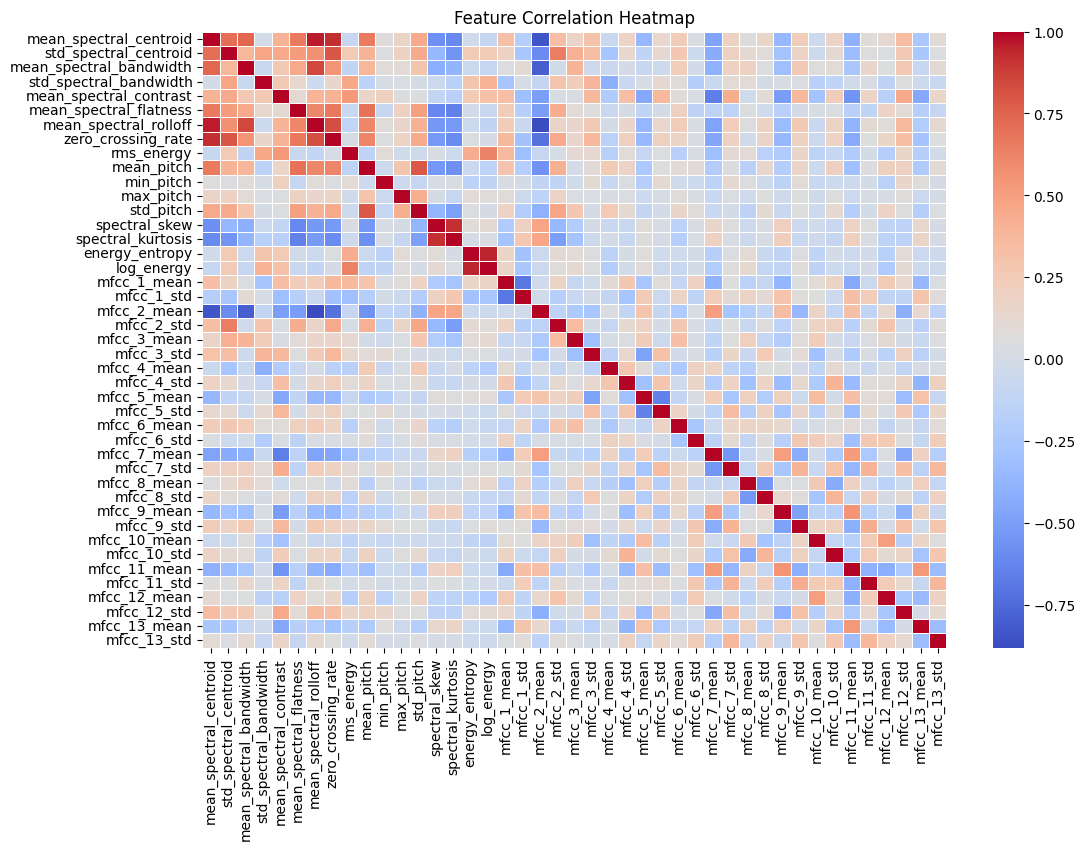

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the label column (target variable)
X = df.drop(columns=["label"])

# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap to visualize correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Identify highly correlated features (threshold = 0.9)
threshold = 0.9
highly_correlated = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            highly_correlated.add(colname)

# Drop highly correlated features
X_reduced = X.drop(columns=highly_correlated)

print(f"Removed {len(highly_correlated)} highly correlated features:", highly_correlated)

Removed 4 highly correlated features: {'zero_crossing_rate', 'log_energy', 'mean_spectral_rolloff', 'spectral_kurtosis'}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['label']   # Target variable (gender label)

# Feature Selection using Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_reduced, y)

# Get the feature importances from Decision Tree
dtree_feature_importances = pd.Series(dtree.feature_importances_, index=X_reduced.columns)
print("Decision Tree Feature Importances:")
print(dtree_feature_importances)

# Feature Selection using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_reduced, y)

# Get the feature importances from Random Forest
rf_feature_importances = pd.Series(rf.feature_importances_, index= X_reduced.columns)
print("Random Forest Feature Importances:")
print(rf_feature_importances)

Decision Tree Feature Importances:
mean_spectral_centroid     0.001057
std_spectral_centroid      0.004600
mean_spectral_bandwidth    0.002289
std_spectral_bandwidth     0.031098
mean_spectral_contrast     0.062655
mean_spectral_flatness     0.000000
rms_energy                 0.093775
mean_pitch                 0.001894
min_pitch                  0.004640
max_pitch                  0.003951
std_pitch                  0.001767
spectral_skew              0.000316
energy_entropy             0.000719
mfcc_1_mean                0.189369
mfcc_1_std                 0.001875
mfcc_2_mean                0.054325
mfcc_2_std                 0.011785
mfcc_3_mean                0.006332
mfcc_3_std                 0.009661
mfcc_4_mean                0.006221
mfcc_4_std                 0.006931
mfcc_5_mean                0.319434
mfcc_5_std                 0.001252
mfcc_6_mean                0.033528
mfcc_6_std                 0.000674
mfcc_7_mean                0.006939
mfcc_7_std                 0.

In [ ]:
# Combine Both Feature Importances
# We'll combine both feature importances and take the average
combined_feature_importances = (dtree_feature_importances + rf_feature_importances) / 2
combined_feature_importances = combined_feature_importances.sort_values(ascending = False)
print("Combined Feature Importances (Decision Tree + Random Forest):")
print(combined_feature_importances)

Combined Feature Importances (Decision Tree + Random Forest):
mfcc_5_mean                0.225233
mfcc_1_mean                0.120872
mean_spectral_contrast     0.081005
rms_energy                 0.065540
mfcc_2_mean                0.058136
std_spectral_bandwidth     0.050345
mfcc_3_std                 0.048953
mfcc_12_mean               0.038338
mfcc_10_std                0.030139
mfcc_6_mean                0.028478
mfcc_10_mean               0.024816
mfcc_8_mean                0.023273
mfcc_13_mean               0.021849
mfcc_8_std                 0.021228
mfcc_2_std                 0.018235
mfcc_4_mean                0.016664
mfcc_7_mean                0.012183
mfcc_3_mean                0.010348
mfcc_11_mean               0.010088
mfcc_9_mean                0.007869
mfcc_4_std                 0.007756
min_pitch                  0.006646
std_spectral_centroid      0.006411
mean_spectral_bandwidth    0.005882
mfcc_12_std                0.005767
mfcc_1_std                 0.005506
mf

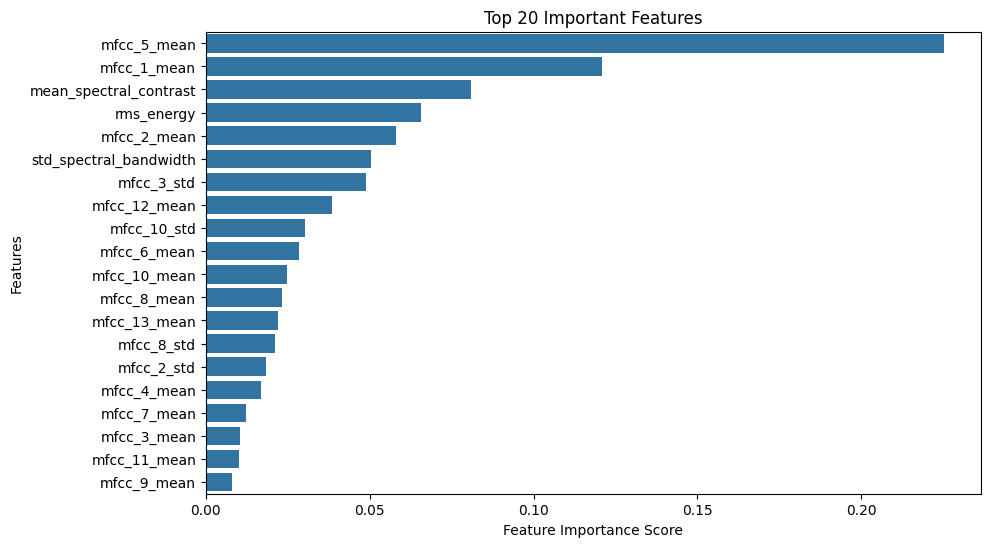

Selected 20 most important features: ['mfcc_5_mean', 'mfcc_1_mean', 'mean_spectral_contrast', 'rms_energy', 'mfcc_2_mean', 'std_spectral_bandwidth', 'mfcc_3_std', 'mfcc_12_mean', 'mfcc_10_std', 'mfcc_6_mean', 'mfcc_10_mean', 'mfcc_8_mean', 'mfcc_13_mean', 'mfcc_8_std', 'mfcc_2_std', 'mfcc_4_mean', 'mfcc_7_mean', 'mfcc_3_mean', 'mfcc_11_mean', 'mfcc_9_mean']


In [ ]:
# Plot top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_feature_importances[:20], y=combined_feature_importances.index[:20])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Important Features")
plt.show()

# Keep top N features (e.g., 20)
top_features = combined_feature_importances[:20].index
X_selected = X_reduced[top_features]

print(f"Selected {len(top_features)} most important features:", top_features.tolist())

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use Logistic Regression for Recursive Feature Elimination (RFE)
log_reg = LogisticRegression(max_iter= 2000, random_state=42)
rfe = RFE(log_reg, n_features_to_select=10)  # Keep top 10 features
X_rfe = rfe.fit_transform(X_selected, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Get selected feature names
selected_rfe_features = X_selected.columns[rfe.support_]
print("RFE selected features:", selected_rfe_features.tolist())

RFE selected features: ['mean_spectral_contrast', 'rms_energy', 'mfcc_3_std', 'mfcc_10_std', 'mfcc_6_mean', 'mfcc_10_mean', 'mfcc_13_mean', 'mfcc_2_std', 'mfcc_4_mean', 'mfcc_9_mean']


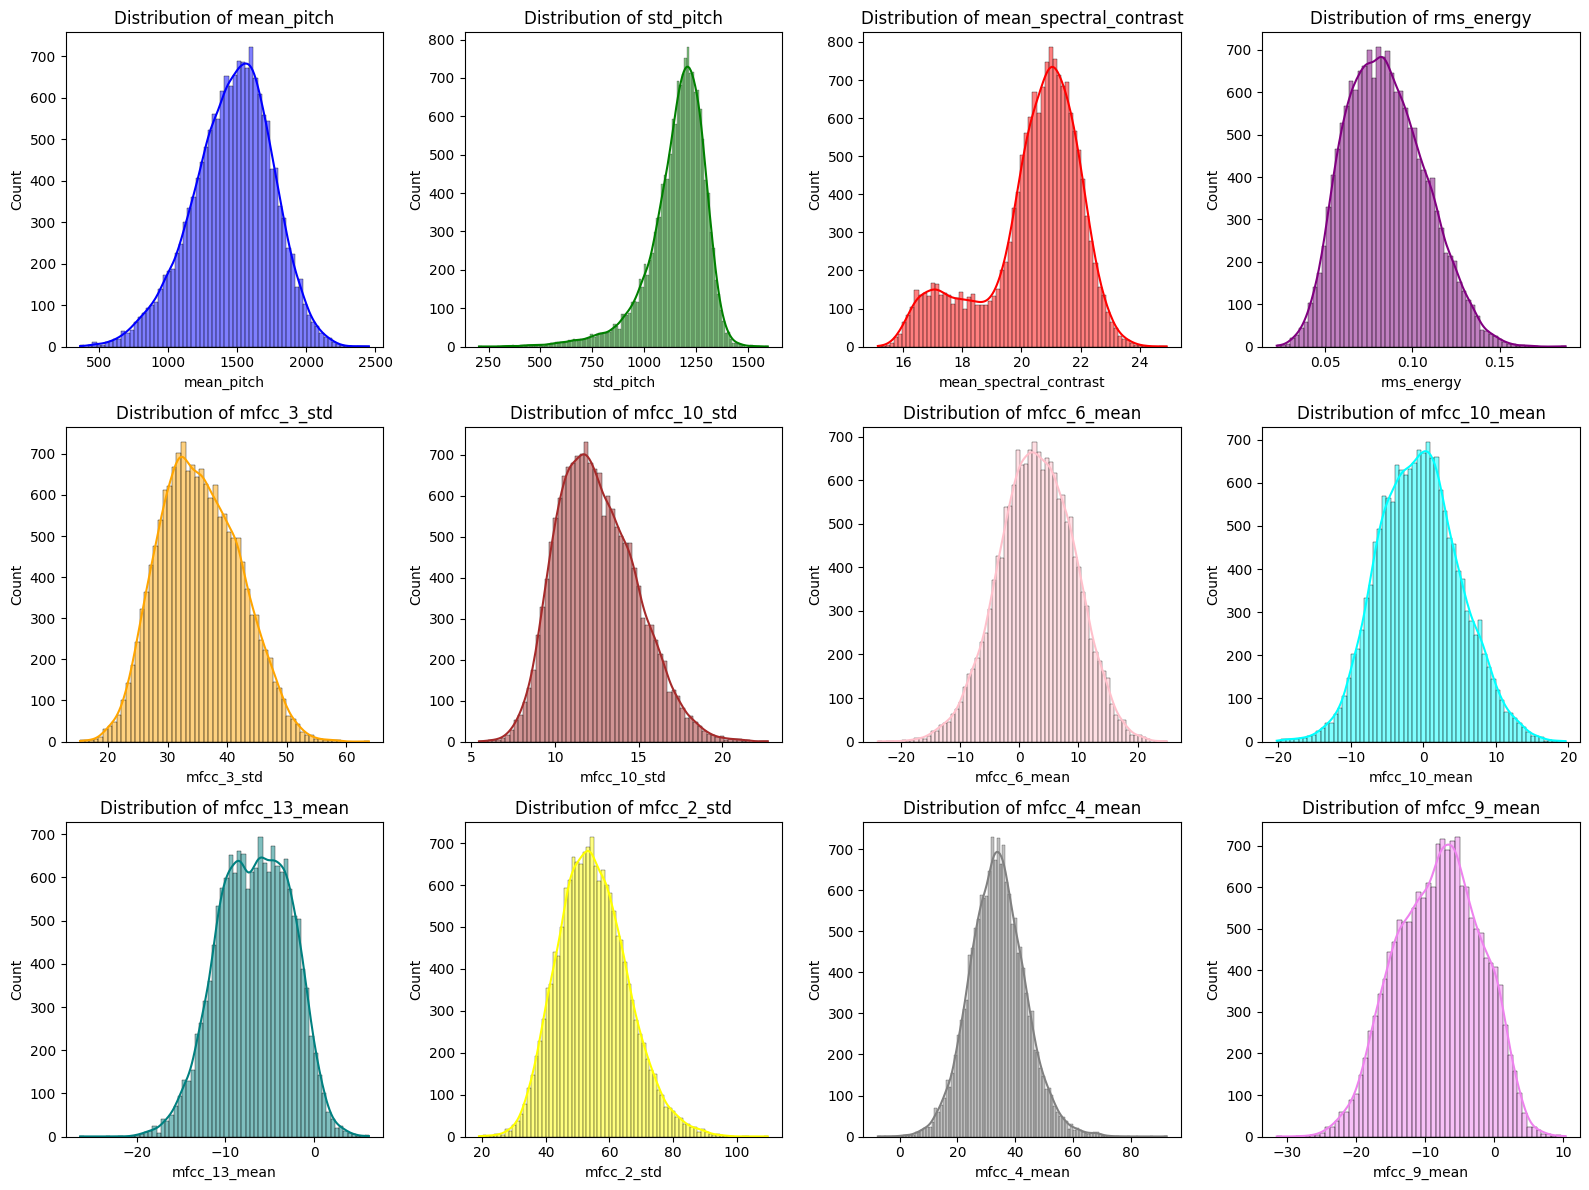

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define final features
final_features = ['mean_pitch','std_pitch',
                  'mean_spectral_contrast', 'rms_energy',
                  'mfcc_3_std', 'mfcc_10_std', 'mfcc_6_mean', 'mfcc_10_mean',
                  'mfcc_13_mean', 'mfcc_2_std', 'mfcc_4_mean', 'mfcc_9_mean']

# Define colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'cyan', 'teal', 'yellow', 'grey', 'violet']

# Plotting setup
plt.figure(figsize=(16, 12))

# Loop through features and create subplots
for i, (feature, color) in enumerate(zip(final_features, colors)):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[feature], kde=True, color=color)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


### Interpreting the Plots for the Selected Features

Each histogram helps in understanding the spread, central tendency, and skewness of the respective feature.

Pitch and Energy Features: The distributions of mean_pitch, std_pitch, and rms_energy provide insights into the variations in pitch and energy levels. These features can indicate tonal stability and intensity.

Spectral Features: mean_spectral_contrast helps understand frequency variations within an audio signal, which is crucial in differentiating sound textures.
MFCC Features: Mel-Frequency Cepstral Coefficients (MFCCs) capture timbral characteristics.

The distributions of mfcc_3_std, mfcc_10_std, mfcc_6_mean, mfcc_10_mean, mfcc_13_mean, mfcc_2_std, mfcc_4_mean, and mfcc_9_mean reveal the variations in different MFCC components, which play a key role in speech and audio classification.

###Plot Interpretations
Some features, such as mean pitch, spectral contrast, and RMS energy, exhibit skewed distributions, indicating that certain instances deviate significantly from the majority.

Features like MFCC means (6, 10, 13, 9, 4) follow approximately normal distributions, which may indicate their stability in capturing sound characteristics.

The presence of multimodal distributions (e.g., mean spectral contrast) could imply different subgroups within the dataset.
The spread and skewness of the features suggest that normalization or transformation might be needed for modeling.


#Feature Selection
Based on the combined feature importance from Decision Tree and Random Forest, we get the top 20 features.

We further refine the features using Recursive Feature Elimination (RFE) and get the best subset of 10 features.

We also include two pitch based features based on domain knowledge of how these features actually help in identifying the gender.

Key Considerations:

Feature Importance: Features with higher importance scores are better at distinguishing between classes (male vs. female voices in this case).
Performance: By selecting only the most important features, we reduce the complexity of the model and speed up training while retaining important information.

The most critical features based on the above feature selection methods :

🔹 mean_pitch -
Male voices have a lower fundamental frequency, while female voices have a higher pitch. This feature directly differentiates vocal range between genders.

🔹 std_pitch -
Measures pitch variation. Female voices tend to have more fluctuations, while male voices are generally more stable.

🔹 mean_spectral_contrast -
Captures differences in energy between high and low frequencies. Male voices emphasize lower frequencies, while female voices have more high-frequency energy.

🔹 rms_energy -
Represents loudness. Male voices typically have higher energy due to stronger low-frequency components.

🔹 mfcc_3_std -
Measures variability in mid-frequency components, which differ between male and female speech patterns.

🔹 mfcc_10_std -
Represents variation in high-order spectral features, helping differentiate vocal tone.

🔹 mfcc_6_mean -
Captures mid-range spectral properties linked to formants, which differ due to vocal tract length variations.

🔹 mfcc_10_mean -
Reflects high-frequency spectral details, where female voices have stronger presence.

🔹 mfcc_13_mean -
Encodes high-frequency voice characteristics, useful in distinguishing male and female timbres.

🔹 mfcc_2_std -
Measures variability in low-frequency components, which are more prominent in male voices.

🔹 mfcc_4_mean -
Represents mid-frequency distribution, where male and female voices exhibit different resonance patterns.

🔹 mfcc_9_mean -
Captures mid-to-high frequency characteristics, helping differentiate vocal texture.

Summary of Features Selected:
Each of these features captures essential aspects of voice frequency, energy, and variation, making them powerful indicators for gender classification.

- Pitch (Mean & Std) → Distinguishes fundamental voice differences.
- Spectral & Energy Features → Captures resonance & loudness differences.
- MFCCs → Encodes voice texture & timbre, which are gender-specific.

#Selected features (12 total)
- mean_pitch
-std_pitch
-mean_spectral_contrast
-rms_energy
-mfcc_3_std
-mfcc_10_std
-mfcc_6_mean
-mfcc_10_mean
-mfcc_13_mean
-mfcc_2_std
-mfcc_4_mean
-mfcc_9_mean

### Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Select only final features
X = df[final_features]
y = df["label"]  #(0 for female, 1 for male)

# Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (11303, 12)
Test set size: (4845, 12)


###  Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardization complete. Shapes:", X_train_scaled.shape, X_test_scaled.shape)

Standardization complete. Shapes: (11303, 12) (4845, 12)


### Addressing the Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:", np.bincount(y_train_balanced))  # Check class distribution

After SMOTE: [7266 7266]


### Training on various models:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_balanced, y_train_balanced)
y_pred_logreg = logreg.predict(X_test_scaled)

# Train SVM
svm = SVC(kernel="rbf")
svm.fit(X_train_balanced, y_train_balanced)
y_pred_svm = svm.predict(X_test_scaled)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
rf.fit(X_train, y_train)  # No need to scale for Random Forest
y_pred_rf = rf.predict(X_test)

In [ ]:
# Compare performance
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Detailed report
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("\nClassification Report - SVM:\n", classification_report(y_test, y_pred_svm))
print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))


🔹 Logistic Regression Accuracy: 0.948813209494324
🔹 SVM Accuracy: 0.9847265221878225
🔹 Random Forest Accuracy: 0.9696594427244583

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      1731
           1       0.97      0.95      0.96      3114

    accuracy                           0.95      4845
   macro avg       0.94      0.95      0.94      4845
weighted avg       0.95      0.95      0.95      4845


Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1731
           1       0.99      0.99      0.99      3114

    accuracy                           0.98      4845
   macro avg       0.98      0.98      0.98      4845
weighted avg       0.98      0.98      0.98      4845


Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.95      0.9

### Deep learning models (LSTMs, CNN)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from transformers import Wav2Vec2Processor, TFWav2Vec2Model
import librosa
import numpy as np

# LSTM Model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1), y_train, epochs=30, batch_size=32, validation_data=(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1), y_test))

# CNN Model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1), y_train, epochs=30, batch_size=32, validation_data=(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1), y_test))



print("LSTM and CNN Models Trained.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.7763 - loss: 0.4744 - val_accuracy: 0.8186 - val_loss: 0.3884
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8257 - loss: 0.3690 - val_accuracy: 0.8561 - val_loss: 0.3265
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8775 - loss: 0.2807 - val_accuracy: 0.9230 - val_loss: 0.1946
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9280 - loss: 0.1904 - val_accuracy: 0.9377 - val_loss: 0.1586
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9421 - loss: 0.1509 - val_accuracy: 0.9571 - val_loss: 0.1211
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.9585 - loss: 0.1090 - val_accuracy: 0.9467 - val_loss: 0.1428
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9628 - loss: 0.0959 - val_accuracy: 0.9713 - val_loss: 0.0806
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9699 - loss: 0.0795 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9035 - loss: 0.2370 - val_accuracy: 0.9366 - val_loss: 0.1816
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9531 - loss: 0.1257 - val_accuracy: 0.9505 - val_loss: 0.1276
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9605 - loss: 0.1089 - val_accuracy: 0.9511 - val_loss: 0.1268
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9628 - loss: 0.1063 - val_accuracy: 0.9579 - val_loss: 0.1114
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9646 - loss: 0.0921 - val_accuracy: 0.9579 - val_loss: 0.1164
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9676 - loss: 0.0870 - val_accuracy: 0.9573 - val_loss: 0.1137
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9643 - loss: 0.0932 - val_accuracy: 0.9583 - val_loss: 0.1142
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9661 - loss: 0.0818 - val_accuracy: 0.9589 - val_

In [ ]:
# Ensure test data is reshaped like training data
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))  # Add 3rd dimension

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Convert probabilities to class labels (assuming a binary classification)
y_pred_lstm_labels = (y_pred_lstm > 0.5).astype(int)

print("LSTM Predictions:", y_pred_lstm_labels.flatten())

# Reshape test data for CNN (assuming 1D convolution)
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))  # Add channel dimension

# Make predictions
y_pred_cnn = cnn_model.predict(X_test_cnn)

# Convert probabilities to class labels
y_pred_cnn_labels = (y_pred_cnn > 0.5).astype(int)

print("CNN Predictions:", y_pred_cnn_labels.flatten())

from sklearn.metrics import accuracy_score, classification_report

# Evaluate LSTM
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm_labels))
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm_labels))

# Evaluate CNN
print("CNN Accuracy:", accuracy_score(y_test, y_pred_cnn_labels))
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn_labels))



152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
LSTM Predictions: [1 0 1 ... 1 1 1]
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN Predictions: [1 0 0 ... 1 1 1]
LSTM Accuracy: 0.9826625386996904
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1731
           1       0.98      0.99      0.99      3114

    accuracy                           0.98      4845
   macro avg       0.98      0.98      0.98      4845
weighted avg       0.98      0.98      0.98      4845

CNN Accuracy: 0.9628482972136223
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1731
           1       0.97      0.97      0.97      3114

    accuracy                           0.96      4845
   macro avg       0.96      0.96      0.96      4845
weighted avg       0.96      0.96      0.96      4845



#Testing on real audio

In [ ]:
import librosa
import numpy as np

# Load an audio file
# file_path = "/content/Record (online-voice-recorder.com).wav"
file_path = "/content/WhatsApp Ptt 2025-03-07 at 2.43.40 PM (online-audio-converter.com).wav"
y, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate

y = librosa.util.normalize(y)

# Extract features
features = {
        "mean_pitch": np.mean(librosa.yin(y,fmin=50, fmax=4000)),  # Fundamental frequency
        "std_pitch": np.std(librosa.yin(y,fmin=50, fmax=4000)),    # Pitch variation
        "mean_spectral_contrast": np.mean(librosa.feature.spectral_contrast(y=y, sr=sr)),  # Frequency contrast
        "rms_energy": np.mean(librosa.feature.rms(y=y)),  # Loudness
        "mfcc_3_std": np.std(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[2]),  # MFCC variations
        "mfcc_10_std": np.std(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[9]),
        "mfcc_6_mean": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[5]),
        "mfcc_10_mean": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[9]),
        "mfcc_13_mean": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[12]),
        "mfcc_2_std": np.std(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[1]),
        "mfcc_4_mean": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[3]),
        "mfcc_9_mean": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[8]),
    }

# Convert features dictionary to DataFrame for scaling
features_df = pd.DataFrame([features])

features_scaled = scaler.transform(features_df)
prediction = svm.predict(features_scaled)
print("Predicted Gender:", "Male" if prediction[0] == 1 else "Female")


Predicted Gender: Female


,Training Data (Avg Female),Training Data (Avg Male),Real Audio
mean_pitch,1447.443071,1467.120477,283.998263
std_pitch,1137.375569,1166.571013,697.196600
mean_spectral_contrast,21.558084,19.741964,18.349236
rms_energy,0.096932,0.078039,0.086349
mfcc_3_std,40.004562,32.849137,42.751183
mfcc_10_std,11.861810,12.868129,11.657383
mfcc_6_mean,2.328217,3.213313,-7.698043
mfcc_10_mean,-3.738285,1.239963,-3.659272
mfcc_13_mean,-6.694990,-6.725303,1.044250
mfcc_2_std,51.295944,56.839674,63.604774


<Figure size 1200x600 with 0 Axes>

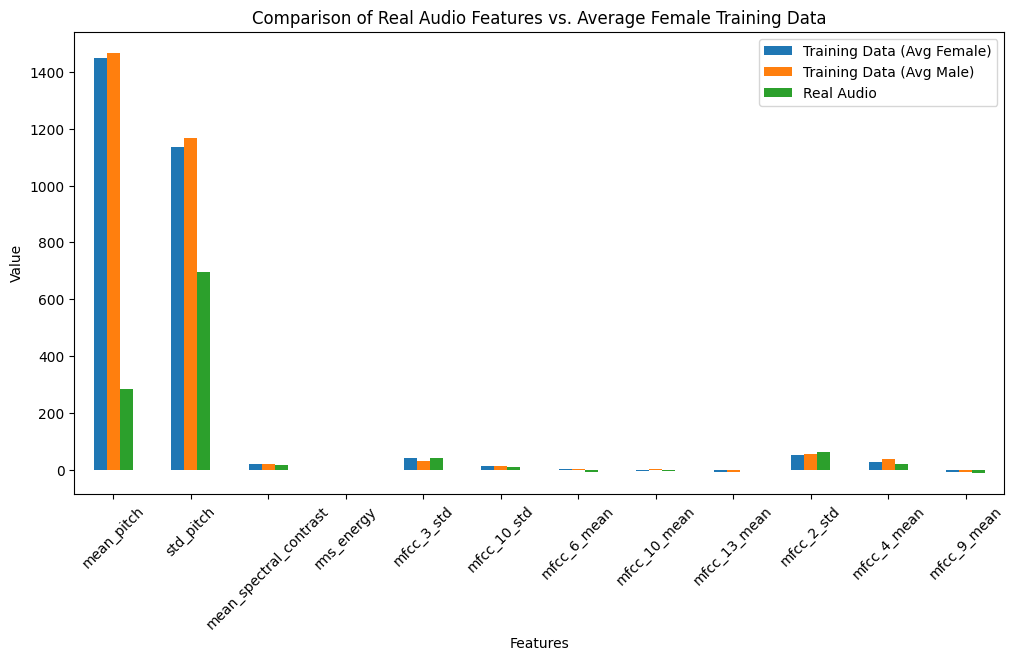

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract average feature values for females in the training dataset
female_data = X_train[y_train == 0]  # Select only female samples
female_avg_features = female_data.mean()  # Compute mean for each feature

male_data = X_train[y_train == 1]  # Select only female samples
Male_avg_features = male_data.mean()  # Compute mean for each feature

# Convert real-world audio features to a Pandas Series for easy comparison
# The issue was here: features_df is a DataFrame with one row,
# we need to convert it to a Series with the correct index
real_audio_features_series = pd.Series(features_df.iloc[0].values, index=female_avg_features.index)

# Compare feature values using a DataFrame
comparison_df = pd.DataFrame({
    "Training Data (Avg Female)": female_avg_features,
    "Training Data (Avg Male)": Male_avg_features,
    "Real Audio": real_audio_features_series
})

# Display the table for comparison
display(comparison_df)

# Plot the comparison for visualization
plt.figure(figsize=(12, 6))
comparison_df.plot(kind="bar", figsize=(12, 6))
plt.title("Comparison of Real Audio Features vs. Average Female Training Data")
plt.xlabel("Features")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(["Training Data (Avg Female)", "Training Data (Avg Male)", "Real Audio"], loc="upper right")
plt.show()